In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# %%
import pandas as pd
org = pd.read_csv('Organizations.csv')

# %%
org.head()

,Id,Name,Slug,CreationDate,Description
0,2,Facebook,facebook,07/25/2016,Facebook was built to help people connect and ...
1,3,Figure Eight,crowdflower,08/20/2016,[Figure Eight](https://www.figure-eight.com/) ...
2,4,Kaggle,kaggle,09/23/2016,Kaggle is a community of data scientists and d...
3,5,Last-Place Ltd.,lastplaceltd,09/27/2016,NaN
4,6,CWILOC,cwiloc,09/27/2016,[Climatological Database for the World's Ocean...


In [2]:

# %%
import re
def find_bioengineering(text, pattern):
    try:
        if re.search(pattern,text):
            return True
        else:
            return False
    except:
        return False
    
file1 = open('biowords.txt', 'r')
Lines = file1.readlines()
bio_words = set()
count = 0;
search_param = ''
for line in Lines:
    count += 1
    if count%2 == 1:
        bio_words.add(str(line.strip()))
        #search_param +=  str(line.strip())  + ' | '
        
bio_words = bio_words - set(['community','community','ecology','ecosystem','element','foot','fruit','inheritance', 'model', 'pedigree', 'seed', 'shell', 'virus'])
for line in bio_words:
    search_param += line + ' | '
    
search_param = '.(' + search_param + 'bio).'
search_param

'.(gestation | hydrolysis | endoskeleton | ectothermic | alternation of generations | semipermeable membrane | plankton | abiogenesis | peptide bond | circulatory system | epithelium | mutualism | biomass | mother cell | antigen | transduction | parasitism | messenger RNA | medusa | passive transport | catalyst | bilateral symmetry | cell wall | cytolysis | medulla oblongata | anabolism | regeneration | gemmule | botany | bivalve | cytoskeleton | phase | symbiosis | abdomen | zygospore | theory | endoplasm | asexual reproduction | diffusion | respiration | metabolism | mutation | isotonic solution | allele | appendicular skeleton | cytoplasm | homeostasis | concentration | hermaphroditic | saprophyte | parasite | nervous system | karyotype | species | xylem | bile | macroevolution | translocation | zygote | active transport | hydrophobic | thorax | pollen | epidermis | excretion | radial symmetry | ectoplasm | antibiotic | placenta | simple eye | catabolism | compound eye | sexual repr

In [3]:
# %%
org['bio_present'] = org.Description.apply(lambda x: find_bioengineering(x, search_param))
org_id_with_description_bio = org[org['bio_present'] == True]
len(org_id_with_description_bio)

21

In [4]:
# %%
comp = pd.read_csv('Competitions.csv')

# %%
comp.head()

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,CompetitionTypeId,HostName,EnabledDate,...,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions
0,2408,Eurovision2010,Forecast Eurovision Voting,This competition requires contestants to forec...,Featured,2.0,NaN,1,NaN,04/07/2010 07:57:43,...,False,False,USD,1000.0,1,1.0,False,22,25,22
1,2435,hivprogression,Predict HIV Progression,This contest requires competitors to predict t...,Featured,1.0,NaN,1,NaN,04/27/2010 21:29:09,...,False,False,USD,500.0,1,1.0,True,107,116,855
2,2438,worldcup2010,World Cup 2010 - Take on the Quants,Quants at Goldman Sachs and JP Morgan have mod...,Featured,NaN,NaN,1,NaN,06/03/2010 08:08:08,...,False,False,USD,100.0,1,0.5,False,0,0,0
3,2439,informs2010,INFORMS Data Mining Contest 2010,The goal of this contest is to predict short t...,Featured,4.0,NaN,1,NaN,06/21/2010 21:53:25,...,False,False,USD,0.0,1,1.0,True,145,153,1483
4,2442,worldcupconf,World Cup 2010 - Confidence Challenge,The Confidence Challenge requires competitors ...,Featured,3.0,NaN,1,NaN,06/03/2010 08:08:08,...,False,False,USD,100.0,1,0.5,False,63,64,63


In [5]:
# %%
competitions_with_bio_background = comp.merge(org_id_with_description_bio,left_on='OrganizationId',right_on = 'Id')
len(competitions_with_bio_background)

12

In [6]:
# %%
competitions_with_bio_background.drop(index=[0,3,4,5,6,10,11], inplace=True)
competitions_with_bio_background.reset_index(inplace=True)
competitions_with_bio_background

,index,Id_x,Slug_x,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,CompetitionTypeId,HostName,...,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions,Id_y,Name,Slug_y,CreationDate,Description,bio_present
0,1,10418,human-protein-atlas-image-classification,Human Protein Atlas Image Classification,Classify subcellular protein patterns in human...,Featured,68207.0,1861.0,1,NaN,...,True,2160,2679,54934,1861,Human Protein Atlas,human-protein-atlas,08/24/2018,The Human Protein Atlas is a Swedish-based pro...,True
1,2,23823,hpa-single-cell-image-classification,Human Protein Atlas - Single Cell Classification,Find individual human cell differences in micr...,Featured,1138531.0,1861.0,1,NaN,...,True,757,991,19058,1861,Human Protein Atlas,human-protein-atlas,08/24/2018,The Human Protein Atlas is a Swedish-based pro...,True
2,7,14420,recursion-cellular-image-classification,Recursion Cellular Image Classification,CellSignal: Disentangling biological signal fr...,Research,260403.0,2872.0,1,NaN,...,True,865,1066,13232,2872,Recursion Pharmaceuticals,recursionpharma,06/14/2019,Recursion Pharmaceuticals is creating an AI-en...,True
3,8,14774,aptos2019-blindness-detection,APTOS 2019 Blindness Detection,Detect diabetic retinopathy to stop blindness ...,Featured,260503.0,2931.0,1,NaN,...,True,2928,3507,71433,2931,Asia Pacific Tele-Ophthalmology Society (APTOS),APTOS-Ophthalmology,06/25/2019,Tele-medicine has made “reaching the unreached...,True
4,9,16245,trends-assessment-prediction,TReNDS Neuroimaging,Multiscanner normative age and assessments pre...,Research,632003.0,3725.0,1,NaN,...,True,1047,1214,14309,3725,GSU/TReNDS,GSU-TReNDS,10/28/2019,The Tri-Institutional Georgia State University...,True


In [7]:
# %%
competitions_with_bio_background['OrganizationId'].unique()


array([1861., 2872., 2931., 3725.])

In [8]:
# %%
subtitle = comp['Subtitle']
comp['bio_present'] = subtitle.apply(lambda x: find_bioengineering(x, search_param))
comp_with_subtitle_bio = comp[comp['bio_present'] == True]
print(len(comp_with_subtitle_bio))


49


In [9]:
comp_with_subtitle_bio.drop(index=[125,127,194, 390, 528, 543, 547, 550, 688, 781, 807, 972, 1273, 1500, 1743, 2201, 2420, 2429, 2512, 2546, 2596,3102, 3472, 3715, 3750, 3796, 4305, 4642, 4790, 4816, 5071, 5158 ], inplace=True)
comp_with_subtitle_bio

C:\Users\mohap\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,CompetitionTypeId,HostName,EnabledDate,...,EnableSubmissionModelAttachments,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions,bio_present
44,2780,bioresponse,Predicting a Biological Response,Predict a biological response of molecules fro...,Featured,109.0,NaN,1,NaN,03/16/2012 19:10:23,...,True,USD,20000.0,3,1.0,True,698,791,8819,True
315,5033,mutex-miner2,MUTeX MINER,Predict the label of mutation in human genome,InClass,1107.0,NaN,1,"CSA, IISc, Bangalore",03/04/2016 22:01:35,...,False,Knowledge,0.0,1,0.0,False,26,26,99,True
364,5360,oropharynx-radiomics-hpv,Oropharynx Cancer (OPC) Radiomics Challenge ::...,Predict from CT data the HPV phenotype of orop...,InClass,1379.0,NaN,1,MICCAI/The University of Texas MD Anderson Can...,07/26/2016 20:48:54,...,False,Knowledge,0.0,1,0.0,False,9,17,70,True
405,5742,glioma-survival-predictions,Glioma Survival Predictions,Determine the probability of one year survival...,InClass,1888.0,NaN,1,University of Warsaw,11/07/2016 20:50:40,...,False,Knowledge,0.0,1,0.0,False,9,12,88,True
437,5999,gene-expression-prediction,Gene Expression Prediction,Predicting gene expression from histone modifi...,InClass,2341.0,NaN,1,Tampere University of Technology,01/09/2017 16:59:43,...,False,Knowledge,0.0,1,0.0,False,105,184,888,True
899,9405,compomics2018,D012554 (2017-2018),Machine Leren methoden voor biomedische gegevens,InClass,30048.0,NaN,1,NaN,04/17/2018 18:27:05,...,False,NaN,0.0,0,0.0,False,16,16,181,True
1696,14420,recursion-cellular-image-classification,Recursion Cellular Image Classification,CellSignal: Disentangling biological signal fr...,Research,260403.0,2872.0,1,NaN,06/27/2019 19:46:50,...,False,USD,13000.0,3,1.0,True,865,1066,13232,True
1760,14752,glioma-radiomics,Radiomics for LGG dataset,Predict deletion of gene 1p19q of patients wit...,InClass,214847.0,NaN,1,NaN,05/24/2019 21:15:16,...,False,NaN,NaN,1,0.0,False,12,12,70,True
1810,15068,trabit2019-imaging-biomarkers,TRABIT2019 Imaging Biomarkers,Find imaging biomarkers in MRI scans to identi...,InClass,255780.0,NaN,1,NaN,06/24/2019 19:24:20,...,False,NaN,NaN,1,0.0,False,22,22,63,True
2019,16601,parasitedetection-iiitb2019,Parasite detection,detect if cell image has parasite or is uninfe...,InClass,391911.0,NaN,1,NaN,10/13/2019 10:34:24,...,False,NaN,NaN,1,0.0,False,14,41,192,True


In [10]:


# %%
print(comp_with_subtitle_bio['OrganizationId'].unique())

# %%
competion_ids = set(list(competitions_with_bio_background['Id_x'])+ list(comp_with_subtitle_bio['Id']))


[  nan 2872. 3750.  209. 1817.]


In [11]:
comp_with_subtitle_bio

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,CompetitionTypeId,HostName,EnabledDate,...,EnableSubmissionModelAttachments,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions,bio_present
44,2780,bioresponse,Predicting a Biological Response,Predict a biological response of molecules fro...,Featured,109.0,NaN,1,NaN,03/16/2012 19:10:23,...,True,USD,20000.0,3,1.0,True,698,791,8819,True
315,5033,mutex-miner2,MUTeX MINER,Predict the label of mutation in human genome,InClass,1107.0,NaN,1,"CSA, IISc, Bangalore",03/04/2016 22:01:35,...,False,Knowledge,0.0,1,0.0,False,26,26,99,True
364,5360,oropharynx-radiomics-hpv,Oropharynx Cancer (OPC) Radiomics Challenge ::...,Predict from CT data the HPV phenotype of orop...,InClass,1379.0,NaN,1,MICCAI/The University of Texas MD Anderson Can...,07/26/2016 20:48:54,...,False,Knowledge,0.0,1,0.0,False,9,17,70,True
405,5742,glioma-survival-predictions,Glioma Survival Predictions,Determine the probability of one year survival...,InClass,1888.0,NaN,1,University of Warsaw,11/07/2016 20:50:40,...,False,Knowledge,0.0,1,0.0,False,9,12,88,True
437,5999,gene-expression-prediction,Gene Expression Prediction,Predicting gene expression from histone modifi...,InClass,2341.0,NaN,1,Tampere University of Technology,01/09/2017 16:59:43,...,False,Knowledge,0.0,1,0.0,False,105,184,888,True
899,9405,compomics2018,D012554 (2017-2018),Machine Leren methoden voor biomedische gegevens,InClass,30048.0,NaN,1,NaN,04/17/2018 18:27:05,...,False,NaN,0.0,0,0.0,False,16,16,181,True
1696,14420,recursion-cellular-image-classification,Recursion Cellular Image Classification,CellSignal: Disentangling biological signal fr...,Research,260403.0,2872.0,1,NaN,06/27/2019 19:46:50,...,False,USD,13000.0,3,1.0,True,865,1066,13232,True
1760,14752,glioma-radiomics,Radiomics for LGG dataset,Predict deletion of gene 1p19q of patients wit...,InClass,214847.0,NaN,1,NaN,05/24/2019 21:15:16,...,False,NaN,NaN,1,0.0,False,12,12,70,True
1810,15068,trabit2019-imaging-biomarkers,TRABIT2019 Imaging Biomarkers,Find imaging biomarkers in MRI scans to identi...,InClass,255780.0,NaN,1,NaN,06/24/2019 19:24:20,...,False,NaN,NaN,1,0.0,False,22,22,63,True
2019,16601,parasitedetection-iiitb2019,Parasite detection,detect if cell image has parasite or is uninfe...,InClass,391911.0,NaN,1,NaN,10/13/2019 10:34:24,...,False,NaN,NaN,1,0.0,False,14,41,192,True


In [12]:
competitions_with_bio_background

,index,Id_x,Slug_x,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,CompetitionTypeId,HostName,...,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions,Id_y,Name,Slug_y,CreationDate,Description,bio_present
0,1,10418,human-protein-atlas-image-classification,Human Protein Atlas Image Classification,Classify subcellular protein patterns in human...,Featured,68207.0,1861.0,1,NaN,...,True,2160,2679,54934,1861,Human Protein Atlas,human-protein-atlas,08/24/2018,The Human Protein Atlas is a Swedish-based pro...,True
1,2,23823,hpa-single-cell-image-classification,Human Protein Atlas - Single Cell Classification,Find individual human cell differences in micr...,Featured,1138531.0,1861.0,1,NaN,...,True,757,991,19058,1861,Human Protein Atlas,human-protein-atlas,08/24/2018,The Human Protein Atlas is a Swedish-based pro...,True
2,7,14420,recursion-cellular-image-classification,Recursion Cellular Image Classification,CellSignal: Disentangling biological signal fr...,Research,260403.0,2872.0,1,NaN,...,True,865,1066,13232,2872,Recursion Pharmaceuticals,recursionpharma,06/14/2019,Recursion Pharmaceuticals is creating an AI-en...,True
3,8,14774,aptos2019-blindness-detection,APTOS 2019 Blindness Detection,Detect diabetic retinopathy to stop blindness ...,Featured,260503.0,2931.0,1,NaN,...,True,2928,3507,71433,2931,Asia Pacific Tele-Ophthalmology Society (APTOS),APTOS-Ophthalmology,06/25/2019,Tele-medicine has made “reaching the unreached...,True
4,9,16245,trends-assessment-prediction,TReNDS Neuroimaging,Multiscanner normative age and assessments pre...,Research,632003.0,3725.0,1,NaN,...,True,1047,1214,14309,3725,GSU/TReNDS,GSU-TReNDS,10/28/2019,The Tri-Institutional Georgia State University...,True


In [13]:
competion_ids

{2780,
 5033,
 5360,
 5742,
 5999,
 9405,
 10418,
 14420,
 14752,
 14774,
 15068,
 16245,
 16601,
 17863,
 19988,
 20182,
 22111,
 23823,
 27870,
 29653,
 32900}

In [14]:
bio_related_comps = comp[comp['Id'].isin(competion_ids)]
bio_related_comps.reset_index(inplace=True)

In [15]:
bio_related_comps.sort_values('TotalCompetitors', ascending=False, inplace=True)

C:\Users\mohap\AppData\Roaming\Python\Python37\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


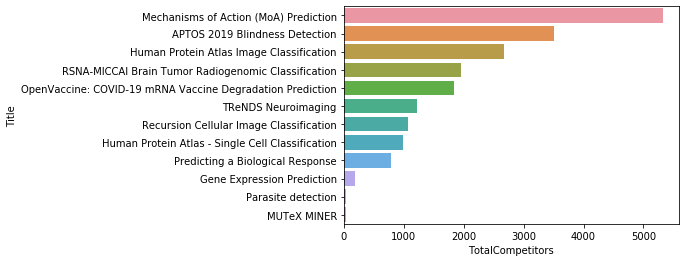

In [16]:
import seaborn as sns
sns.barplot(x='TotalCompetitors', y='Title',data= bio_related_comps[:12], orient='h')

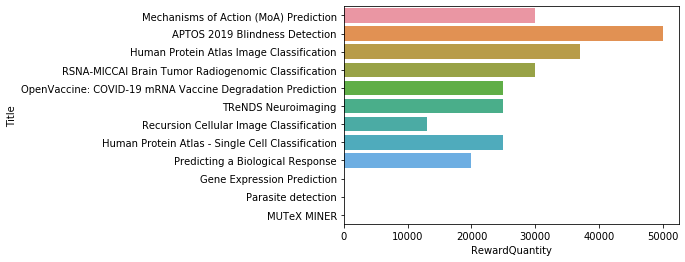

In [17]:

sns.barplot(x='RewardQuantity', y='Title',data= bio_related_comps[:12], orient='h')

In [18]:
bio_related_comps['RewardQuantity']

14    30000.0
9     50000.0
6     37000.0
19    30000.0
16    25000.0
11    25000.0
7     13000.0
17    25000.0
0     20000.0
4         0.0
12        NaN
1         0.0
10        NaN
13        NaN
2         0.0
5         0.0
8         NaN
3         0.0
15        NaN
18        NaN
20        NaN
Name: RewardQuantity, dtype: float64

In [19]:
bio_related_comps.keys()

Index(['index', 'Id', 'Slug', 'Title', 'Subtitle', 'HostSegmentTitle',
       'ForumId', 'OrganizationId', 'CompetitionTypeId', 'HostName',
       'EnabledDate', 'DeadlineDate', 'ProhibitNewEntrantsDeadlineDate',
       'TeamMergerDeadlineDate', 'TeamModelDeadlineDate',
       'ModelSubmissionDeadlineDate', 'FinalLeaderboardHasBeenVerified',
       'HasKernels', 'OnlyAllowKernelSubmissions', 'HasLeaderboard',
       'LeaderboardPercentage', 'LeaderboardDisplayFormat',
       'EvaluationAlgorithmAbbreviation', 'EvaluationAlgorithmName',
       'EvaluationAlgorithmDescription', 'EvaluationAlgorithmIsMax',
       'ValidationSetName', 'ValidationSetValue', 'MaxDailySubmissions',
       'NumScoredSubmissions', 'MaxTeamSize', 'BanTeamMergers',
       'EnableTeamModels', 'EnableSubmissionModelHashes',
       'EnableSubmissionModelAttachments', 'RewardType', 'RewardQuantity',
       'NumPrizes', 'UserRankMultiplier', 'CanQualifyTiers', 'TotalTeams',
       'TotalCompetitors', 'TotalSubmissions

In [32]:
bio_comp_drop= bio_related_comps[[
       'MaxDailySubmissions',
       'NumScoredSubmissions', 'MaxTeamSize', 'BanTeamMergers','RewardType', 'RewardQuantity',
       'NumPrizes',
       'TotalCompetitors','TotalSubmissions','CanQualifyTiers','LeaderboardPercentage']]


In [38]:
bio_comp_drop['RewardType'].fillna('No Reward', inplace=True)
bio_comp_drop['RewardType']

14          USD
9           USD
6           USD
19          USD
16          USD
11          USD
7           USD
17          USD
0           USD
4     Knowledge
12    No Reward
1     Knowledge
10    No Reward
13    No Reward
2     Knowledge
5     No Reward
8     No Reward
3     Knowledge
15    No Reward
18    No Reward
20    No Reward
Name: RewardType, dtype: object

In [47]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
bio_comp_drop['RewardType'] = label_encoder.fit_transform(bio_comp_drop['RewardType'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [48]:
bio_comp_corr=bio_comp_drop.corr()

In [49]:
bio_comp_drop

,MaxDailySubmissions,NumScoredSubmissions,MaxTeamSize,BanTeamMergers,RewardType,RewardQuantity,NumPrizes,TotalCompetitors,TotalSubmissions,CanQualifyTiers,LeaderboardPercentage
14,3,2,5.0,False,2,30000.0,4,5323,88732,True,25
9,5,2,5.0,False,2,50000.0,4,3507,71433,True,15
6,5,2,8.0,False,2,37000.0,4,2679,54934,True,29
19,5,2,5.0,False,2,30000.0,8,1958,27466,True,22
16,5,2,5.0,False,2,25000.0,3,1839,35806,True,9
11,3,2,5.0,False,2,25000.0,3,1214,14309,True,48
7,5,2,5.0,False,2,13000.0,3,1066,13232,True,22
17,5,2,5.0,False,2,25000.0,3,991,19058,True,31
0,2,5,NaN,False,2,20000.0,3,791,8819,True,25
4,2,2,NaN,True,0,0.0,1,184,888,False,50


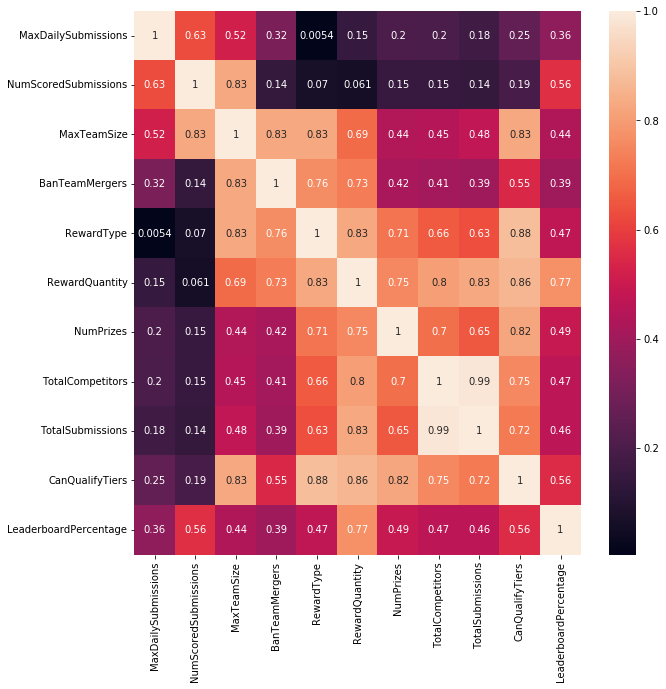

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(abs(bio_comp_corr),annot = True)

In [51]:
bio_comp_corr

,MaxDailySubmissions,NumScoredSubmissions,MaxTeamSize,BanTeamMergers,RewardType,RewardQuantity,NumPrizes,TotalCompetitors,TotalSubmissions,CanQualifyTiers,LeaderboardPercentage
MaxDailySubmissions,1.000000,0.630278,0.519701,-0.317660,0.005365,0.145282,-0.203869,-0.199634,-0.175600,-0.254751,0.363842
NumScoredSubmissions,0.630278,1.000000,0.826797,-0.144498,-0.069644,-0.060885,-0.149954,-0.149623,-0.142409,-0.193777,0.564926
MaxTeamSize,0.519701,0.826797,1.000000,-0.826797,0.826797,0.692101,0.441942,0.446355,0.479314,0.826797,-0.439776
BanTeamMergers,-0.317660,-0.144498,-0.826797,1.000000,-0.763058,-0.731887,-0.420778,-0.407615,-0.393919,-0.547723,0.394292
RewardType,0.005365,-0.069644,0.826797,-0.763058,1.000000,0.831203,0.711441,0.657925,0.633261,0.879883,-0.471979
RewardQuantity,0.145282,-0.060885,0.692101,-0.731887,0.831203,1.000000,0.754786,0.802058,0.826248,0.862538,-0.771466
NumPrizes,-0.203869,-0.149954,0.441942,-0.420778,0.711441,0.754786,1.000000,0.697881,0.651287,0.822008,-0.491768
TotalCompetitors,-0.199634,-0.149623,0.446355,-0.407615,0.657925,0.802058,0.697881,1.000000,0.987179,0.753735,-0.465341
TotalSubmissions,-0.175600,-0.142409,0.479314,-0.393919,0.633261,0.826248,0.651287,0.987179,1.000000,0.721142,-0.464401
CanQualifyTiers,-0.254751,-0.193777,0.826797,-0.547723,0.879883,0.862538,0.822008,0.753735,0.721142,1.000000,-0.556797


In [59]:
common = set()
for i in range(len(bio_comp_corr.columns)):
    for j in range(len(bio_comp_corr.columns)):
        if bio_comp_corr[bio_comp_corr.columns[i]][bio_comp_corr.columns[j]] >= 0.5 and i != j:
            if (bio_comp_corr.columns[j], bio_comp_corr.columns[i]) not in common:
                common.add((bio_comp_corr.columns[i], bio_comp_corr.columns[j]))

In [ ]:
# Feautures with High Correlation

In [60]:
common

{('MaxDailySubmissions', 'MaxTeamSize'),
 ('MaxDailySubmissions', 'NumScoredSubmissions'),
 ('MaxTeamSize', 'CanQualifyTiers'),
 ('MaxTeamSize', 'RewardQuantity'),
 ('MaxTeamSize', 'RewardType'),
 ('NumPrizes', 'CanQualifyTiers'),
 ('NumPrizes', 'TotalCompetitors'),
 ('NumPrizes', 'TotalSubmissions'),
 ('NumScoredSubmissions', 'LeaderboardPercentage'),
 ('NumScoredSubmissions', 'MaxTeamSize'),
 ('RewardQuantity', 'CanQualifyTiers'),
 ('RewardQuantity', 'NumPrizes'),
 ('RewardQuantity', 'TotalCompetitors'),
 ('RewardQuantity', 'TotalSubmissions'),
 ('RewardType', 'CanQualifyTiers'),
 ('RewardType', 'NumPrizes'),
 ('RewardType', 'RewardQuantity'),
 ('RewardType', 'TotalCompetitors'),
 ('RewardType', 'TotalSubmissions'),
 ('TotalCompetitors', 'CanQualifyTiers'),
 ('TotalCompetitors', 'TotalSubmissions'),
 ('TotalSubmissions', 'CanQualifyTiers')}